## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [59]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
TheOffice_dataframe = pd.read_csv('datasets/office_episodes.csv')
print(TheOffice_dataframe.head())
#print(TheOffice_dataframe.columns)

   episode_number  season  episode_title  \
0               0       1          Pilot   
1               1       1  Diversity Day   
2               2       1    Health Care   
3               3       1   The Alliance   
4               4       1     Basketball   

                                         description  ratings  votes  \
0  The premiere episode introduces the boss and s...      7.5   4936   
1  Michael's off color remark puts a sensitivity ...      8.3   4801   
2  Michael leaves Dwight in charge of picking the...      7.8   4024   
3  Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4  Michael and his staff challenge the warehouse ...      8.4   4294   

   viewership_mil  duration release_date guest_stars         director  \
0            11.2        23   2005-03-24         NaN       Ken Kwapis   
1             6.0        23   2005-03-29         NaN       Ken Kwapis   
2             5.8        22   2005-04-05         NaN  Ken Whittingham   
3         

In [61]:
TheOffice_episodeNumbers = TheOffice_dataframe['episode_number']
print(TheOffice_episodeNumbers.head())

0    0
1    1
2    2
3    3
4    4
Name: episode_number, dtype: int64


In [62]:
TheOffice_viewership = TheOffice_dataframe['viewership_mil']
print(TheOffice_viewership.head())

0    11.2
1     6.0
2     5.8
3     5.4
4     5.0
Name: viewership_mil, dtype: float64


In [63]:
# color coding system
colours = []
for label,row in TheOffice_dataframe.iterrows():
    if row['scaled_ratings'] < 0.25:
        colours.append('red')
    elif row['scaled_ratings'] < 0.50:
        colours.append('orange')
    elif row['scaled_ratings'] < 0.75:
        colours.append('lightgreen')
    else:
        colours.append('darkgreen')

In [64]:
# sizing system

size = []
for label,row in TheOffice_dataframe.iterrows():
    if row['has_guests'] == False:
        size.append(25)
    else:
        size.append(250)
print(size)

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250, 25, 25, 250, 25, 250, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 25, 25, 25, 250, 250, 25, 25, 25, 250, 25, 25, 25, 25, 25, 25, 25, 250, 25, 25, 250, 25, 250]


In [65]:
TheOffice_dataframe['colours'] = colours
TheOffice_dataframe['size'] = size

In [66]:
guests = TheOffice_dataframe[TheOffice_dataframe['has_guests']==True]
guests_episode=guests['episode_number']
guests_viewership=guests['viewership_mil']
guests_colour = guests['colours']


In [67]:
no_guests = TheOffice_dataframe[TheOffice_dataframe['has_guests']==False]
no_guests_episode=no_guests['episode_number']
no_guests_viewership=no_guests['viewership_mil']
no_guests_colour = no_guests['colours']

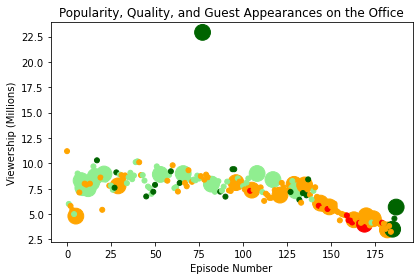

In [68]:
fig = plt.figure()
plt.scatter(guests_episode,guests_viewership,c=guests_colour,s=250)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.scatter(no_guests_episode,no_guests_viewership,c=no_guests_colour,s=25)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

In [69]:
print(TheOffice_dataframe[TheOffice_dataframe['viewership_mil'] > 20]['guest_stars'])
topstar = 

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object
